In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [3]:
import pandas as pd

# Load dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\gen ai project\rain_forecasting.csv")

# Display settings for full alignment
pd.set_option('display.max_rows', None)          # show all rows
pd.set_option('display.max_columns', None)       # show all columns
pd.set_option('display.width', None)             # prevent line wrapping
pd.set_option('display.max_colwidth', None)      # show full column content

print("✅ Dataset Loaded Successfully!")
print(f"Shape: {data.shape}")

# Print first 30 rows fully aligned
print(data.head(30).to_string(index=True))


✅ Dataset Loaded Successfully!
Shape: (1000, 12)
          Date   Location  MinTemp  MaxTemp  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  WindSpeed9am  WindSpeed3pm RainToday RainTomorrow
0   2025-01-01     Mumbai     20.6     28.7           67           37       1001.4       1007.0            10            13        No           No
1   2025-01-02  New Delhi     29.3     35.8           46           34       1008.3       1005.7            10             5        No           No
2   2025-01-03     Mumbai     26.0     42.5           74           89       1009.6        998.9            16            23       Yes          Yes
3   2025-01-04    Kolkata     24.0     39.6           94           38       1010.6       1002.3            16             9        No           No
4   2025-01-05  New Delhi     17.3     41.1           67           30       1005.6        999.4            14            23       Yes           No
5   2025-01-06  Bangalore     17.3     38.2           53           65

In [5]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the entire dataframe
display(data)


,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No
5,2025-01-06,Bangalore,17.3,38.2,53,65,1008.5,1012.5,10,5,No,No
6,2025-01-07,Bangalore,15.9,38.8,95,64,1006.8,1000.0,21,19,No,No
7,2025-01-08,Chennai,28.0,42.0,49,31,1010.1,1000.3,23,20,No,No
8,2025-01-09,Mumbai,24.0,30.0,55,69,1008.8,1011.3,22,11,Yes,Yes
9,2025-01-10,New Delhi,25.6,34.8,55,52,1007.9,1012.2,10,16,Yes,No


In [7]:
# Preprocessing
if "Date" in data.columns:
    df = data.drop(columns=["Date"])
display(df)


,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No
1,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No
2,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes
3,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No
4,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No
5,Bangalore,17.3,38.2,53,65,1008.5,1012.5,10,5,No,No
6,Bangalore,15.9,38.8,95,64,1006.8,1000.0,21,19,No,No
7,Chennai,28.0,42.0,49,31,1010.1,1000.3,23,20,No,No
8,Mumbai,24.0,30.0,55,69,1008.8,1011.3,22,11,Yes,Yes
9,New Delhi,25.6,34.8,55,52,1007.9,1012.2,10,16,Yes,No


In [8]:
# Encode categorical columns
label_enc = LabelEncoder()
for col in ["Location", "RainToday", "RainTomorrow"]:
    if col in df.columns:
        df[col] = label_enc.fit_transform(df[col].astype(str))
display(df)

,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,3,20.6,28.7,67,37,1001.4,1007.0,10,13,0,0
1,4,29.3,35.8,46,34,1008.3,1005.7,10,5,0,0
2,3,26.0,42.5,74,89,1009.6,998.9,16,23,1,1
3,2,24.0,39.6,94,38,1010.6,1002.3,16,9,0,0
4,4,17.3,41.1,67,30,1005.6,999.4,14,23,1,0
5,0,17.3,38.2,53,65,1008.5,1012.5,10,5,0,0
6,0,15.9,38.8,95,64,1006.8,1000.0,21,19,0,0
7,1,28.0,42.0,49,31,1010.1,1000.3,23,20,0,0
8,3,24.0,30.0,55,69,1008.8,1011.3,22,11,1,1
9,4,25.6,34.8,55,52,1007.9,1012.2,10,16,1,0


In [9]:
# Define Comfort Index
df["TempRange"] = df["MaxTemp"] - df["MinTemp"]
df["ComfortIndex"] = (
    100
    - (df["TempRange"].abs() * 0.5)
    - (abs(df["Humidity3pm"] - 50) * 0.3)
    - (df["WindSpeed3pm"] * 0.2)
)
df["ComfortIndex"] = df["ComfortIndex"].clip(lower=0, upper=100)

In [10]:
# Features & Target
X = df.drop(columns=["ComfortIndex"])
y = df["ComfortIndex"]

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 1. Standardization for Linear Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = {}
for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
print("\nModel Performance (Hold-out test set):")
print(results_df)


Model Performance (Hold-out test set):
                       RMSE        R2
Linear Regression  2.168760  0.830573
Random Forest      0.763263  0.979015
XGBoost            0.693746  0.982664


In [14]:
# 2. Cross-Validation
from sklearn.model_selection import cross_val_score

print("\nCross-Validation Results (5-fold R²):")
for name, model in models.items():
    if name == "Linear Regression":
        scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring="r2")
    else:
        scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    print(f"{name}: Mean R² = {scores.mean():.3f}, Std = {scores.std():.3f}")


Cross-Validation Results (5-fold R²):
Linear Regression: Mean R² = 0.805, Std = 0.011
Random Forest: Mean R² = 0.972, Std = 0.006
XGBoost: Mean R² = 0.978, Std = 0.004


In [15]:
# Pick best based on R²
best_model_name = results_df["R2"].idxmax()
print(f"\nBest Model: {best_model_name}")

import joblib

if best_model_name == "Linear Regression":
    best_model = LinearRegression().fit(scaler.fit_transform(X), y)
    joblib.dump((best_model, scaler), "comfort_index_best_model.pkl")
else:
    if best_model_name == "Random Forest":
        best_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y)
    else:
        best_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0).fit(X, y)
    joblib.dump(best_model, "comfort_index_best_model.pkl")

print("Best model saved as comfort_index_best_model.pkl")


Best Model: XGBoost
Best model saved as comfort_index_best_model.pkl


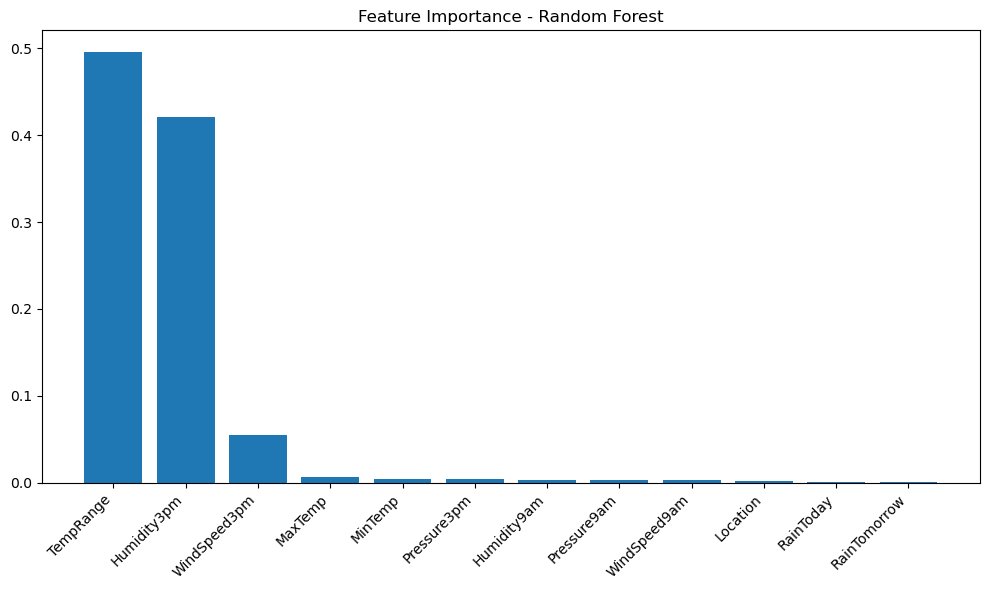

In [16]:
# Feature Importance - Random Forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha="right")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# Predictions
y_pred = rf_model.predict(X_test)

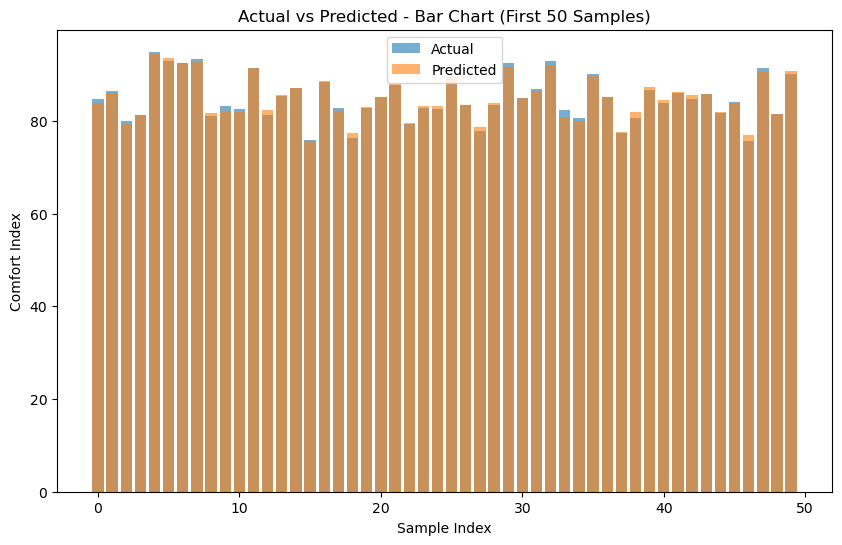

In [19]:
# 1. Bar Chart (First 50 samples)

plt.figure(figsize=(10,6))
plt.bar(range(50), y_test[:50], alpha=0.6, label="Actual")
plt.bar(range(50), y_pred[:50], alpha=0.6, label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Comfort Index")
plt.title("Actual vs Predicted - Bar Chart (First 50 Samples)")
plt.legend()
plt.show()

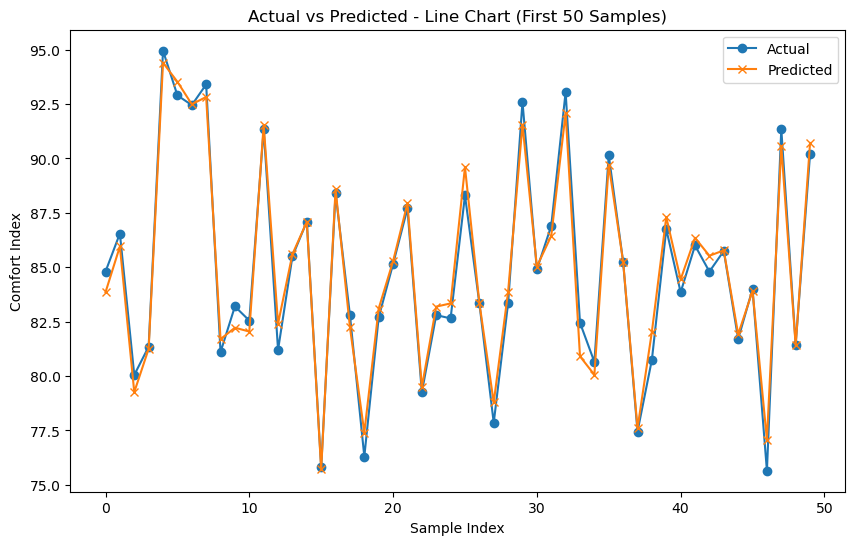

In [18]:
# 2. Line Chart

plt.figure(figsize=(10,6))
plt.plot(y_test[:50].values, label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Comfort Index")
plt.title("Actual vs Predicted - Line Chart (First 50 Samples)")
plt.legend()
plt.show()

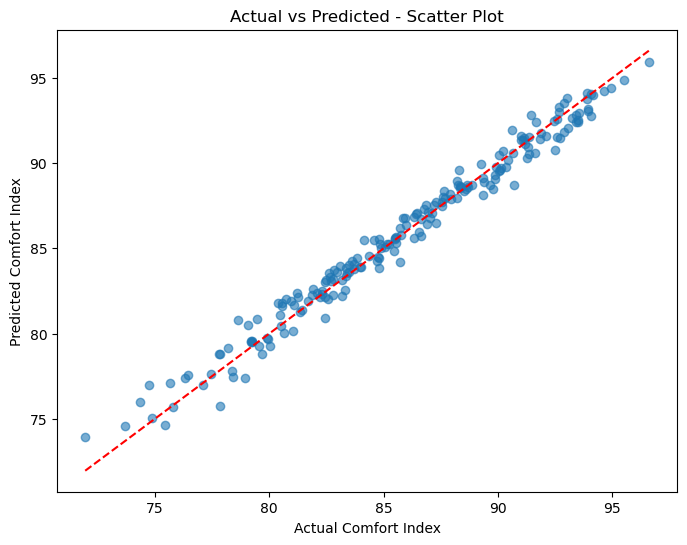

In [20]:
# 3. Scatter Plot

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # perfect line
plt.xlabel("Actual Comfort Index")
plt.ylabel("Predicted Comfort Index")
plt.title("Actual vs Predicted - Scatter Plot")
plt.show()

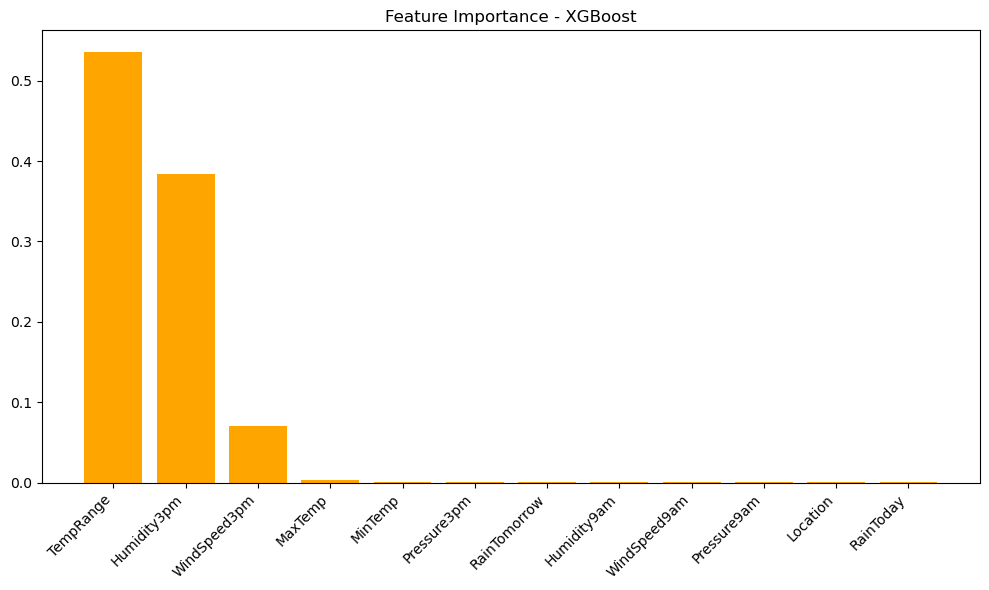

In [21]:
# Feature Importance - XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_indices], align="center", color="orange")
plt.xticks(range(len(xgb_importances)), [features[i] for i in xgb_indices], rotation=45, ha="right")
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

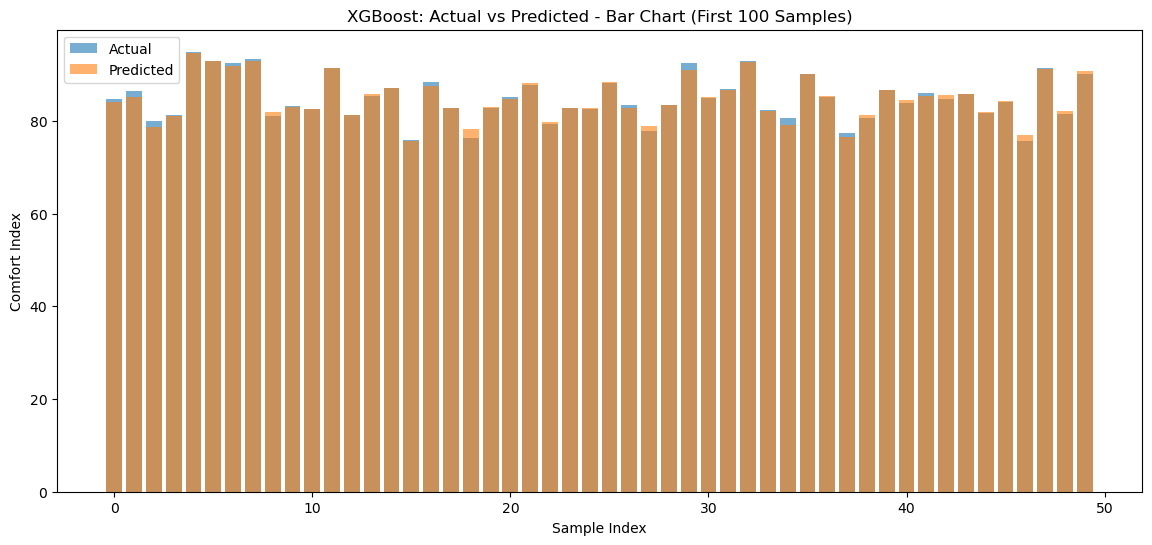

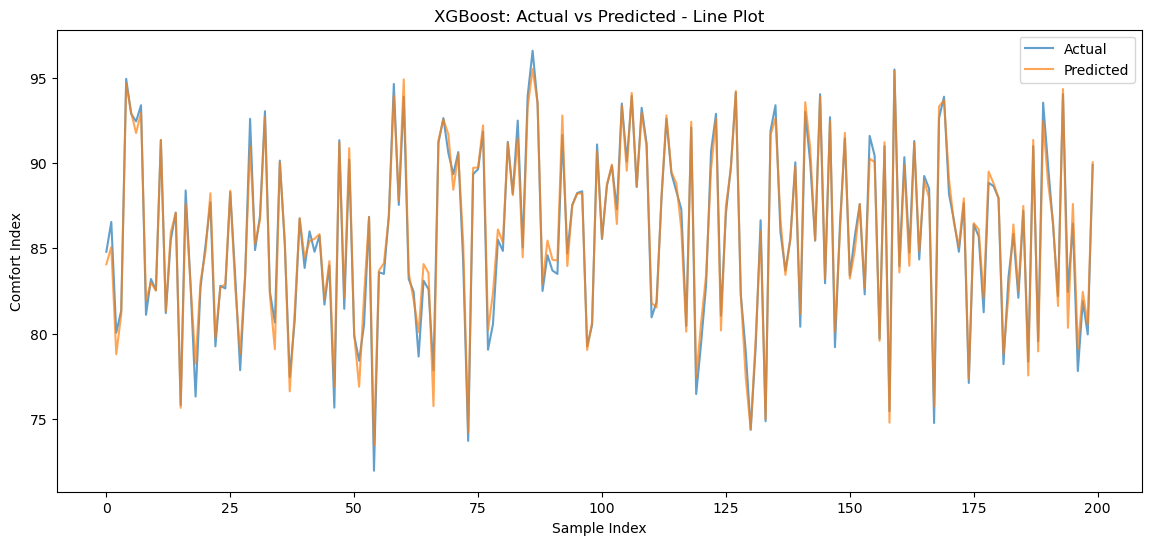

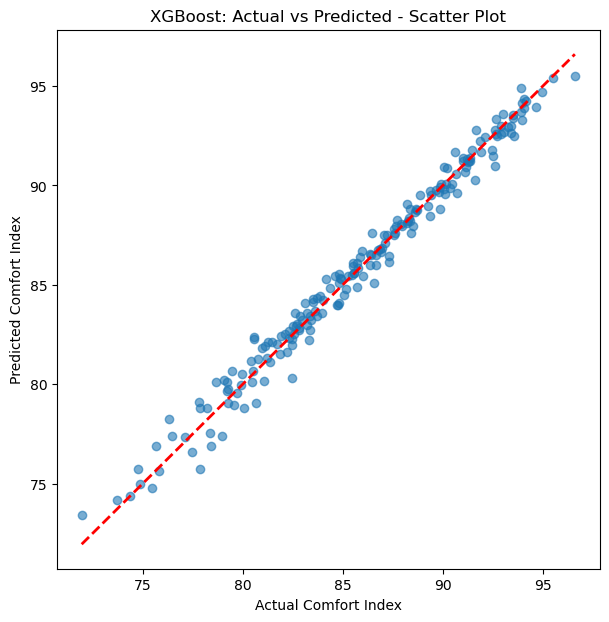

In [22]:
# XGBoost - Actual vs Predicted Plots
# Predictions
xgb_y_pred = xgb_model.predict(X_test)
# 1. Bar Chart (First 50 samples)
plt.figure(figsize=(14,6))
plt.bar(range(50), y_test[:50], alpha=0.6, label="Actual")
plt.bar(range(50), xgb_y_pred[:50], alpha=0.6, label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Comfort Index")
plt.title("XGBoost: Actual vs Predicted - Bar Chart (First 100 Samples)")
plt.legend()
plt.show()

# 2. Line Plot (All samples)
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(xgb_y_pred, label="Predicted", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Comfort Index")
plt.title("XGBoost: Actual vs Predicted - Line Plot")
plt.legend()
plt.show()

# 3. Scatter Plot (All samples)
plt.figure(figsize=(7,7))
plt.scatter(y_test, xgb_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Comfort Index")
plt.ylabel("Predicted Comfort Index")
plt.title("XGBoost: Actual vs Predicted - Scatter Plot")
plt.show()


In [24]:
# 1️⃣ Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 2️⃣ Generate predictions
rf_y_pred = rf_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)

# 3️⃣ Convert Regression Output → Classification
rf_y_pred_class = np.round(rf_y_pred).astype(int)
xgb_y_pred_class = np.round(xgb_y_pred).astype(int)
y_test_class = np.round(y_test).astype(int)

# 4️⃣ Clip values (0–100)
rf_y_pred_class = np.clip(rf_y_pred_class, 0, 100)
xgb_y_pred_class = np.clip(xgb_y_pred_class, 0, 100)
y_test_class = np.clip(y_test_class, 0, 100)


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Random Forest metrics
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Performance:")
print(f"  MSE  : {rf_mse:.4f}")
print(f"  RMSE : {rf_rmse:.4f}")
print(f"  R²   : {rf_r2:.4f}")

# XGBoost metrics
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\nXGBoost Performance:")
print(f"  MSE  : {xgb_mse:.4f}")
print(f"  RMSE : {xgb_rmse:.4f}")
print(f"  R²   : {xgb_r2:.4f}")


Random Forest Performance:
  MSE  : 0.5826
  RMSE : 0.7633
  R²   : 0.9790

XGBoost Performance:
  MSE  : 0.4813
  RMSE : 0.6937
  R²   : 0.9827


In [26]:
# Classification Metrics

rf_accuracy = accuracy_score(y_test_class, rf_y_pred_class)
rf_precision = precision_score(y_test_class, rf_y_pred_class, average="weighted", zero_division=0)
rf_recall = recall_score(y_test_class, rf_y_pred_class, average="weighted", zero_division=0)
rf_f1 = f1_score(y_test_class, rf_y_pred_class, average="weighted", zero_division=0)

xgb_accuracy = accuracy_score(y_test_class, xgb_y_pred_class)
xgb_precision = precision_score(y_test_class, xgb_y_pred_class, average="weighted", zero_division=0)
xgb_recall = recall_score(y_test_class, xgb_y_pred_class, average="weighted", zero_division=0)
xgb_f1 = f1_score(y_test_class, xgb_y_pred_class, average="weighted", zero_division=0)

print("\nRandom Forest Classification Metrics:")
print(f"  Accuracy : {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall   : {rf_recall:.4f}")
print(f"  F1 Score : {rf_f1:.4f}")

print("\nXGBoost Classification Metrics:")
print(f"  Accuracy : {xgb_accuracy:.4f}")
print(f"  Precision: {xgb_precision:.4f}")
print(f"  Recall   : {xgb_recall:.4f}")
print(f"  F1 Score : {xgb_f1:.4f}")


Random Forest Classification Metrics:
  Accuracy : 0.4650
  Precision: 0.4809
  Recall   : 0.4650
  F1 Score : 0.4587

XGBoost Classification Metrics:
  Accuracy : 0.5950
  Precision: 0.6010
  Recall   : 0.5950
  F1 Score : 0.5884



Final Metrics Comparison:
                    MSE      RMSE        R²  Accuracy  Precision  Recall  \
Random Forest  0.582571  0.763263  0.979015     0.465   0.480850   0.465   
XGBoost        0.481284  0.693746  0.982664     0.595   0.601024   0.595   

               F1 Score  
Random Forest  0.458712  
XGBoost        0.588432  


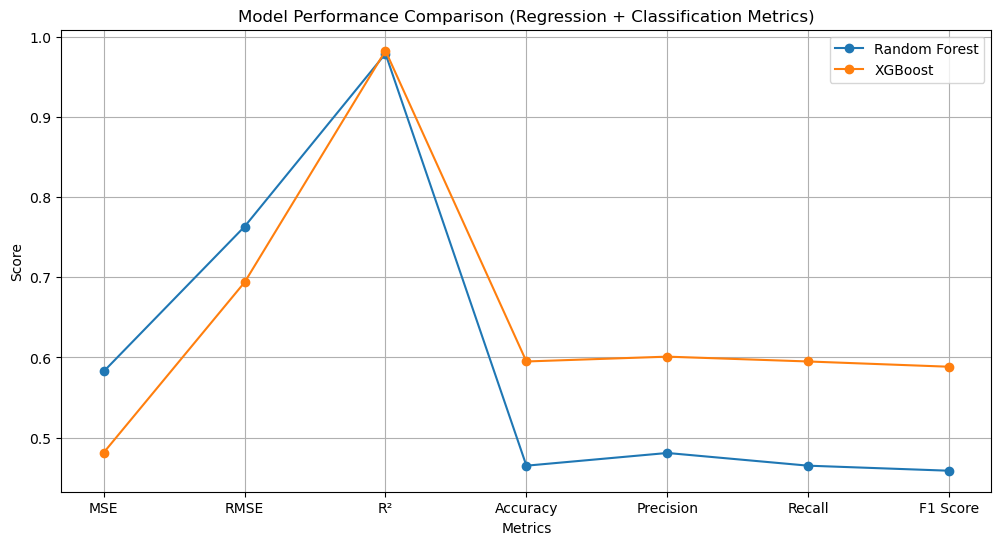

In [27]:
# Combine All Metrics for Comparison

metrics = {
    "MSE": [rf_mse, xgb_mse],
    "RMSE": [rf_rmse, xgb_rmse],
    "R²": [rf_r2, xgb_r2],
    "Accuracy": [rf_accuracy, xgb_accuracy],
    "Precision": [rf_precision, xgb_precision],
    "Recall": [rf_recall, xgb_recall],
    "F1 Score": [rf_f1, xgb_f1]
}

metrics_df = pd.DataFrame(metrics, index=["Random Forest", "XGBoost"])
print("\nFinal Metrics Comparison:")
print(metrics_df)

# -------------------------------
# Line Chart for All Metrics
# -------------------------------
plt.figure(figsize=(12, 6))
for model in metrics_df.index:
    plt.plot(metrics_df.columns, metrics_df.loc[model], marker="o", label=model)

plt.title("Model Performance Comparison (Regression + Classification Metrics)")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Final Comfort Statement (Based on Best Model)
# Choose which model to use for final comfort check (XGBoost in this case)
final_predictions = xgb_model.predict(X_test)

# Take average predicted comfort index
avg_comfort = np.mean(final_predictions)

if avg_comfort >= 60:
    print("\nFinal Statement: YES, can be considered comfortable ")
else:
    print("\nFinal Statement: NO, cannot be considered comfortable ")



Final Statement: YES, can be considered comfortable 
